In [ ]:
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


 Target Created

✅ Model: Logistic Regression
Accuracy: 0.6306451612903226

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.92      0.75       382
           1       0.57      0.16      0.25       238

    accuracy                           0.63       620
   macro avg       0.60      0.54      0.50       620
weighted avg       0.61      0.63      0.56       620



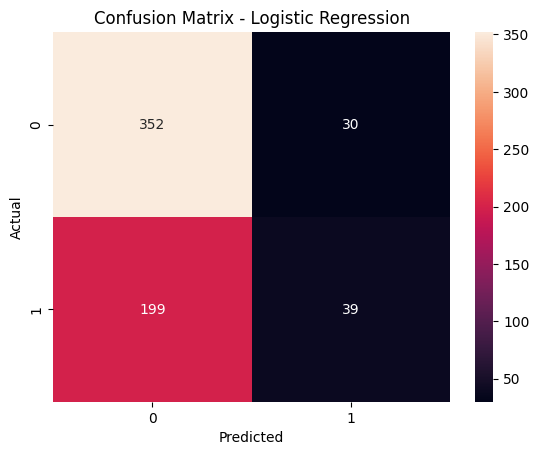


✅ Model: Random Forest
Accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.86      0.75       382
           1       0.58      0.31      0.41       238

    accuracy                           0.65       620
   macro avg       0.63      0.59      0.58       620
weighted avg       0.63      0.65      0.62       620



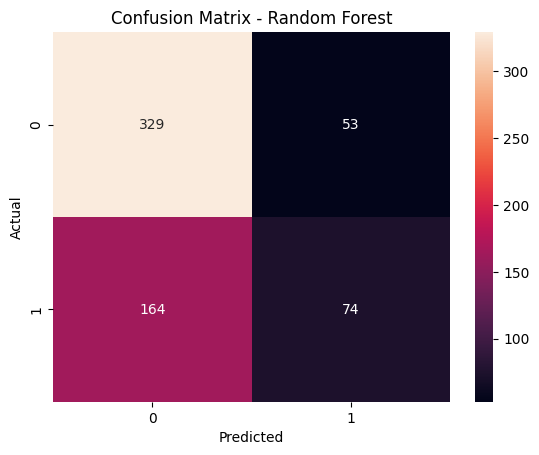

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\Uni_Projects\Mehodology_Project\Cleaned_Data.csv")


median_sales = df['Monthly_Purchases'].median()

df['Sales_Class'] = df['Monthly_Purchases'].apply(
    lambda x: 1 if x > median_sales else 0
)



print(" Target Created")


X = df[['Price', 'Ratings', 'Brand']]
y = df['Sales_Class']


preprocessor = ColumnTransformer(
    transformers=[
        ('brand', OneHotEncoder(handle_unknown='ignore'), ['Brand'])
    ],
    remainder='passthrough'
)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        random_state=42
    )
}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


for name, model in models.items():
    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    
    print("\n✅ Model:", name)
    print("Accuracy:", acc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()